In [2]:
library("Seurat")
library("tidyverse")
library("cowplot")
library("patchwork")

Loading Seurat v5 beta version 
To maintain compatibility with previous workflows, new Seurat objects will use the previous object structure by default
To use new Seurat v5 assays: Please run: options(Seurat.object.assay.version = 'v5')

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp



Attaching package: ‘patchwork’




In [3]:
library(ggalluvial)
library(dplyr)

In [3]:
library('ggplot2')

In [4]:
TeO_Glu <- readRDS('/data/work/5month_TeO/10_TeO_Glu_unannotation.rds')
TeO_Glu

An object of class Seurat 
18448 features across 14339 samples within 2 assays 
Active assay: RNA (16448 features, 0 variable features)
 2 layers present: counts, data
 1 other assay present: integrated
 2 dimensional reductions calculated: pca, umap

In [5]:
TeO_Glu

An object of class Seurat 
18448 features across 14339 samples within 2 assays 
Active assay: RNA (16448 features, 0 variable features)
 2 layers present: counts, data
 1 other assay present: integrated
 2 dimensional reductions calculated: pca, umap

In [7]:
Idents(TeO_Glu) <- TeO_Glu$`Sample_ID`

# Data preprocessing and dimensionality reduction
budgerigar_brain_obj_list <- SplitObject(TeO_Glu, split.by = "Sample_ID")

# NormalizeData
for (name in names(budgerigar_brain_obj_list)) {

    budgerigar_brain_obj_list[[name]] <- NormalizeData(budgerigar_brain_obj_list[[name]], normalization.method = "LogNormalize", assay = "RNA")

    budgerigar_brain_obj_list[[name]] <- FindVariableFeatures(budgerigar_brain_obj_list[[name]], assay = "RNA", nfeatures = 2000, selection.method = "vst")
}

integrated_features <- SelectIntegrationFeatures(object.list = budgerigar_brain_obj_list)

budgerigar_brain_obj_list <- lapply(X = budgerigar_brain_obj_list, FUN = function(x) {
    x <- ScaleData(x, features = integrated_features, verbose = FALSE)
    x <- RunPCA(x, features = integrated_features, verbose = FALSE)
})


####rpca
anchors <- FindIntegrationAnchors(object.list = budgerigar_brain_obj_list, anchor.features = integrated_features, reduction = "rpca")

TeO_Glu <- IntegrateData(anchorset = anchors, normalization.method = "LogNormalize")

In [10]:
# Scale data (default: only for variable features)
variable_feature <- rownames(TeO_Glu)

In [11]:
TeO_Glu <- ScaleData(TeO_Glu, features = variable_feature, vars.to.regress = c("nCount_RNA"))

Regressing out nCount_RNA

Centering and scaling data matrix



In [13]:
options(repr.plot.width = 9, repr.plot.height = 9)
DefaultAssay(TeO_Glu) <- "integrated"

# PCA

TeO_Glu <- RunPCA(TeO_Glu, assay = "integrated", verbose = T) 

PC_ 1 
Positive:  DSCAM, GRIA1, GABRB2, CNTNAP5, CHL1, NTNG1, KLHL1, MDGA1, PDE7B, IL1RAPL1 
	   CDH11, CDH18, HPCAL1, ELAVL2, GRIN3A, MYO16, ENSMUNG00000006766, PCDH17, DMD, ENSMUNG00000009092 
	   CCK, VCAN, TMEM178B, PDGFA, SYT10, MCTP1, ENSMUNG00000003450, SNTG1, ENSMUNG00000014070, DPP10 
Negative:  BVES, ENSMUNG00000003215, POPDC3, SVIL, ENSMUNG00000005044, CABP7, CDC7, MSRB3, LRRK1, MEIS2 
	   SPHKAP, ENSMUNG00000007222, ST8SIA6, PTCHD4, DLK1, ENSMUNG00000013578, PCP4, RGS2, THSD1, ABI3BP 
	   CTTN, PLCH2, CTNNAL1, ENSMUNG00000009759, TRPC3, ASAP2, DOCK8, HACD1, NKTR, FANCL 
PC_ 2 
Positive:  ENSMUNG00000005123, POSTN, FXN, ZEB2, GFRA1, ENSMUNG00000014285, WNT4, LDLRAD4, EBF1, ADCY2 
	   FAM184B, SLC38A6, NR5A2, RORB, INPP4B, SOSTDC1, SEMA3D, DLK1, SHOX, MPP7 
	   FAT3, KIAA1217, IL1RAPL1, ENSMUNG00000006874, SH3RF3, ANOS1, MTNR1A, GRIN2A, ARL15, SNTG1 
Negative:  GRIK2, ENSMUNG00000006766, DSCAM, TCF7L2, SCG2, SYT10, ZFHX4, MEIS2, VCAN, PCDH17 
	   PTPRK, KLHL1, CRACD, TAFA2, S

In [14]:
TeO_Glu <- FindNeighbors(TeO_Glu, dims = 1:40, reduction = "pca")

Computing nearest neighbor graph

Computing SNN



Loading required package: ggraph


Attaching package: ‘ggraph’


The following object is masked from ‘package:sp’:

    geometry


Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
14:54:26 UMAP embedding parameters a = 0.9922 b = 1.112

14:54:26 Read 14339 rows and found 40 numeric columns

14:54:26 Using Annoy for neighbor search, n_neighbors = 30

14:54:26 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

14:54:28 Writing NN index file to temp file /tmp/RtmpPbcWP7/file23b67e7a15f

14:54:28 Searching Annoy index using 1 thread, search_k 

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 14339
Number of edges: 625549

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9055
Number of communities: 17
Elapsed time: 2 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 14339
Number of edges: 625549

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8782
Number of communities: 22
Elapsed time: 3 seconds


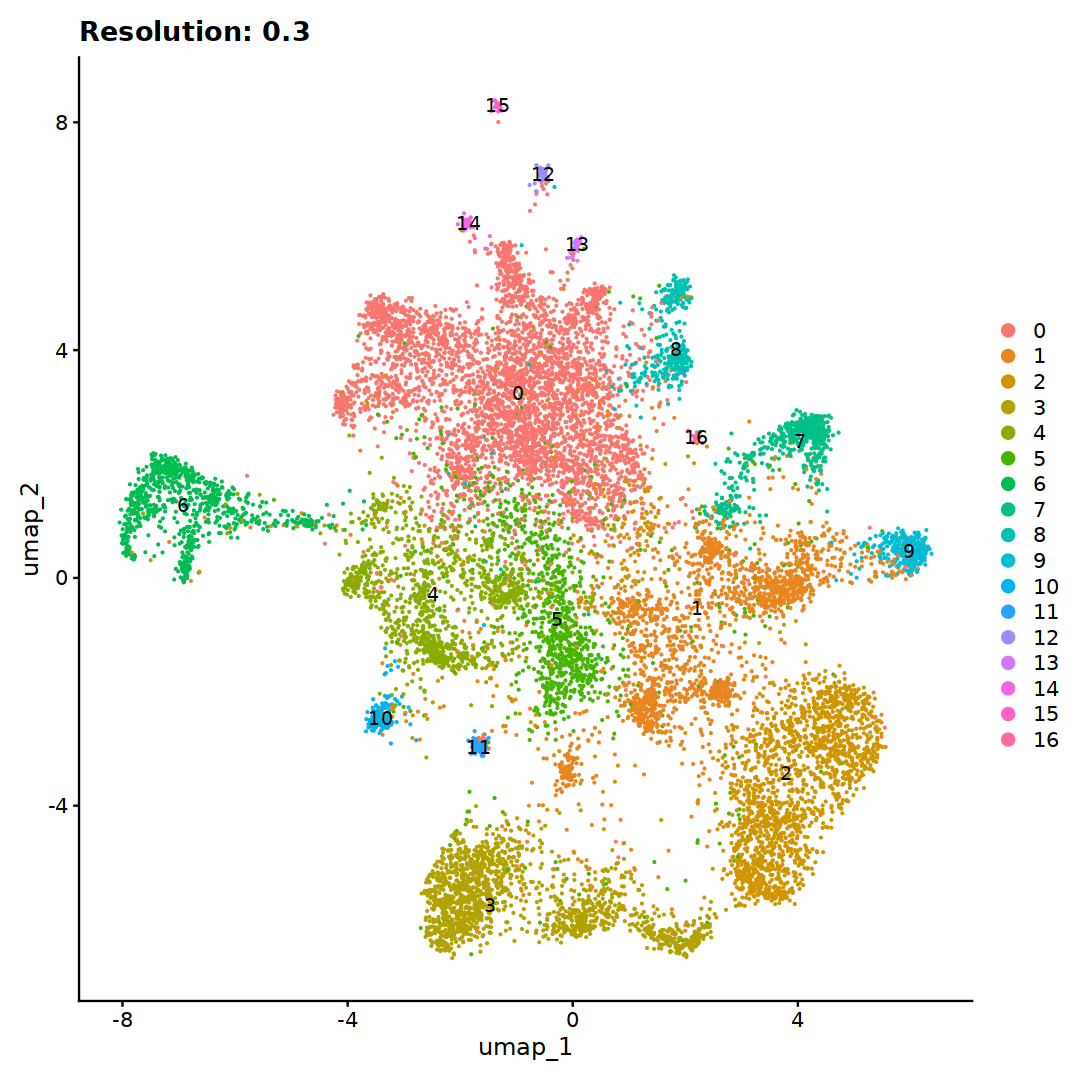

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 14339
Number of edges: 625549

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8585
Number of communities: 25
Elapsed time: 3 seconds


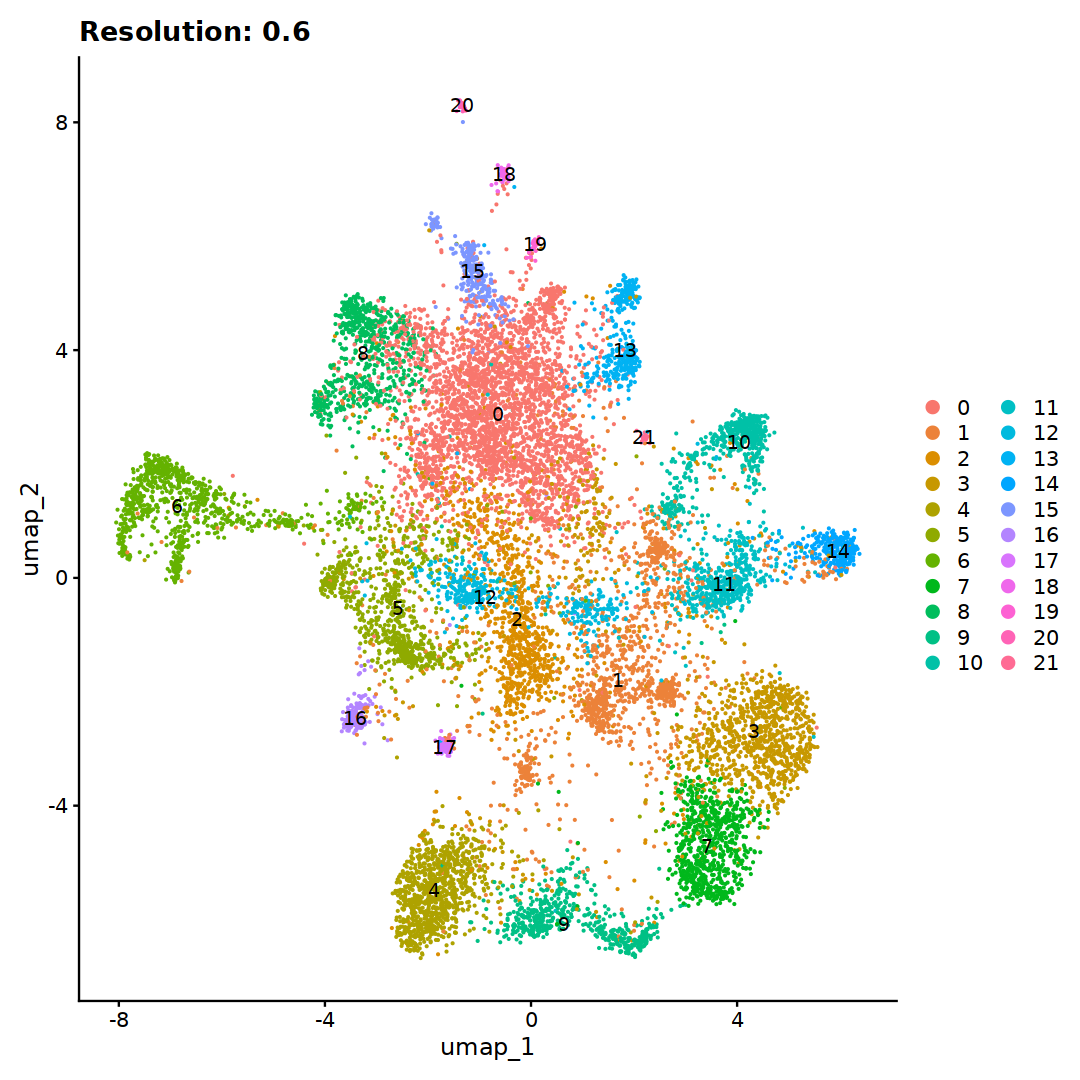

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 14339
Number of edges: 625549

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8523
Number of communities: 26
Elapsed time: 2 seconds


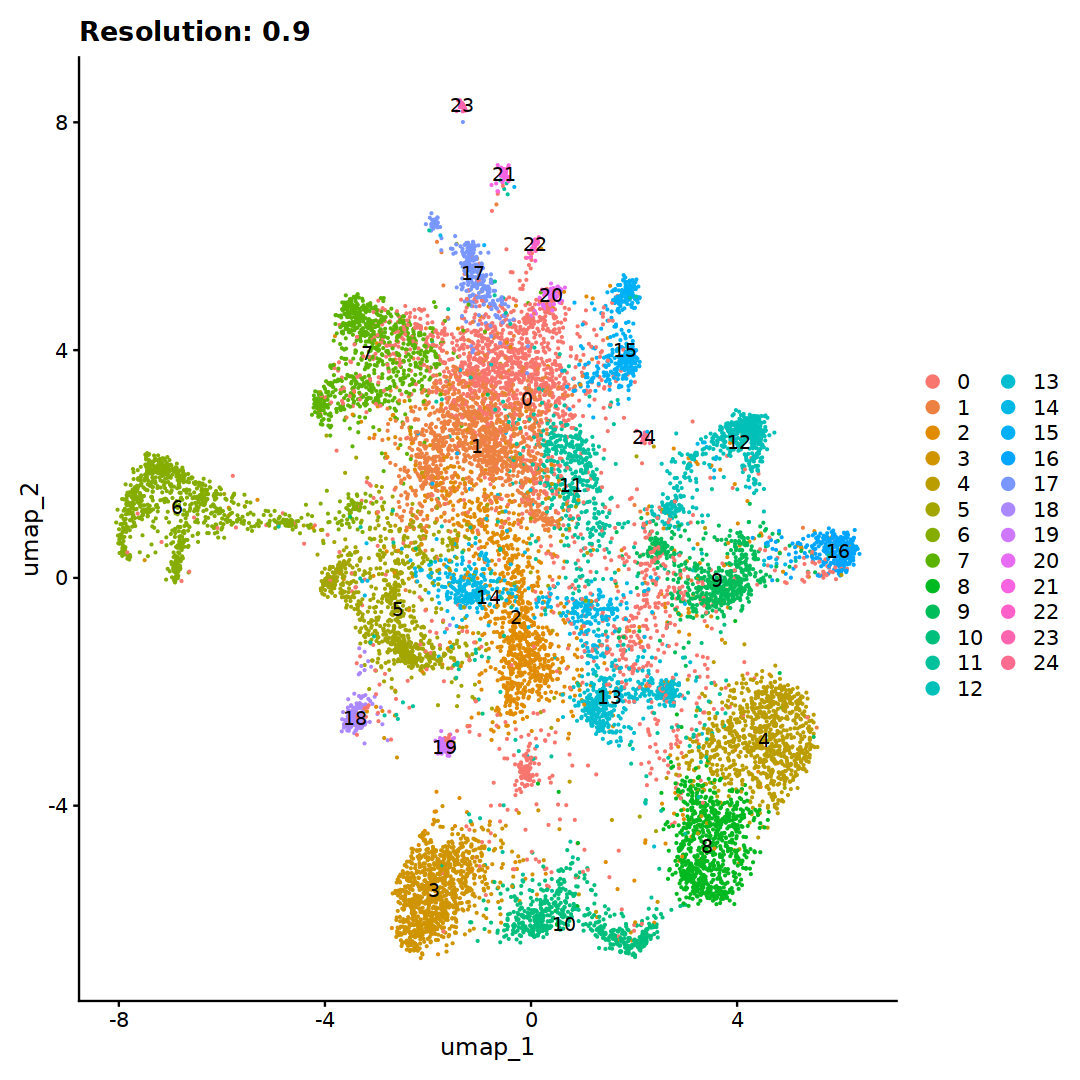

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 14339
Number of edges: 625549

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8407
Number of communities: 26
Elapsed time: 5 seconds


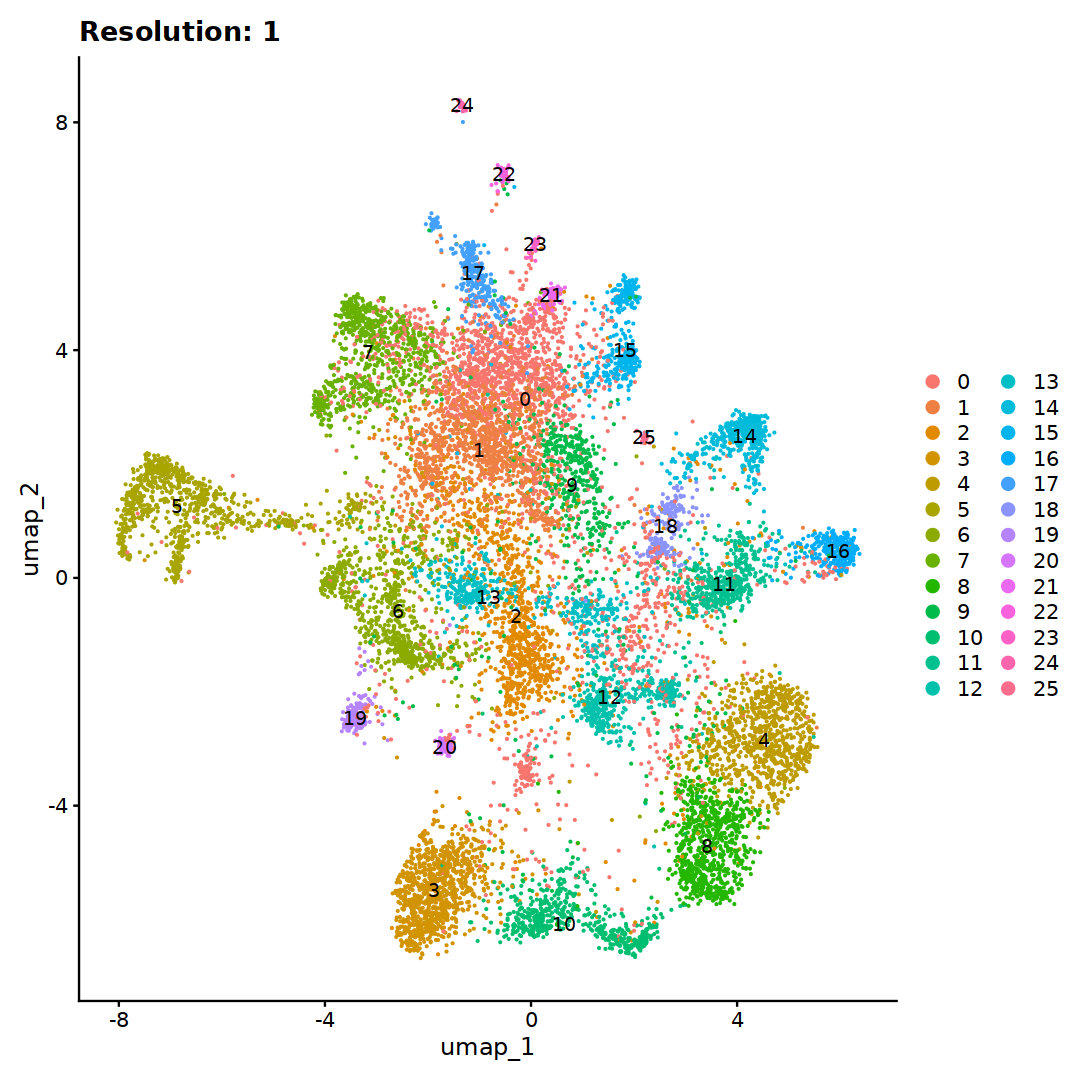

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 14339
Number of edges: 625549

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8250
Number of communities: 29
Elapsed time: 2 seconds


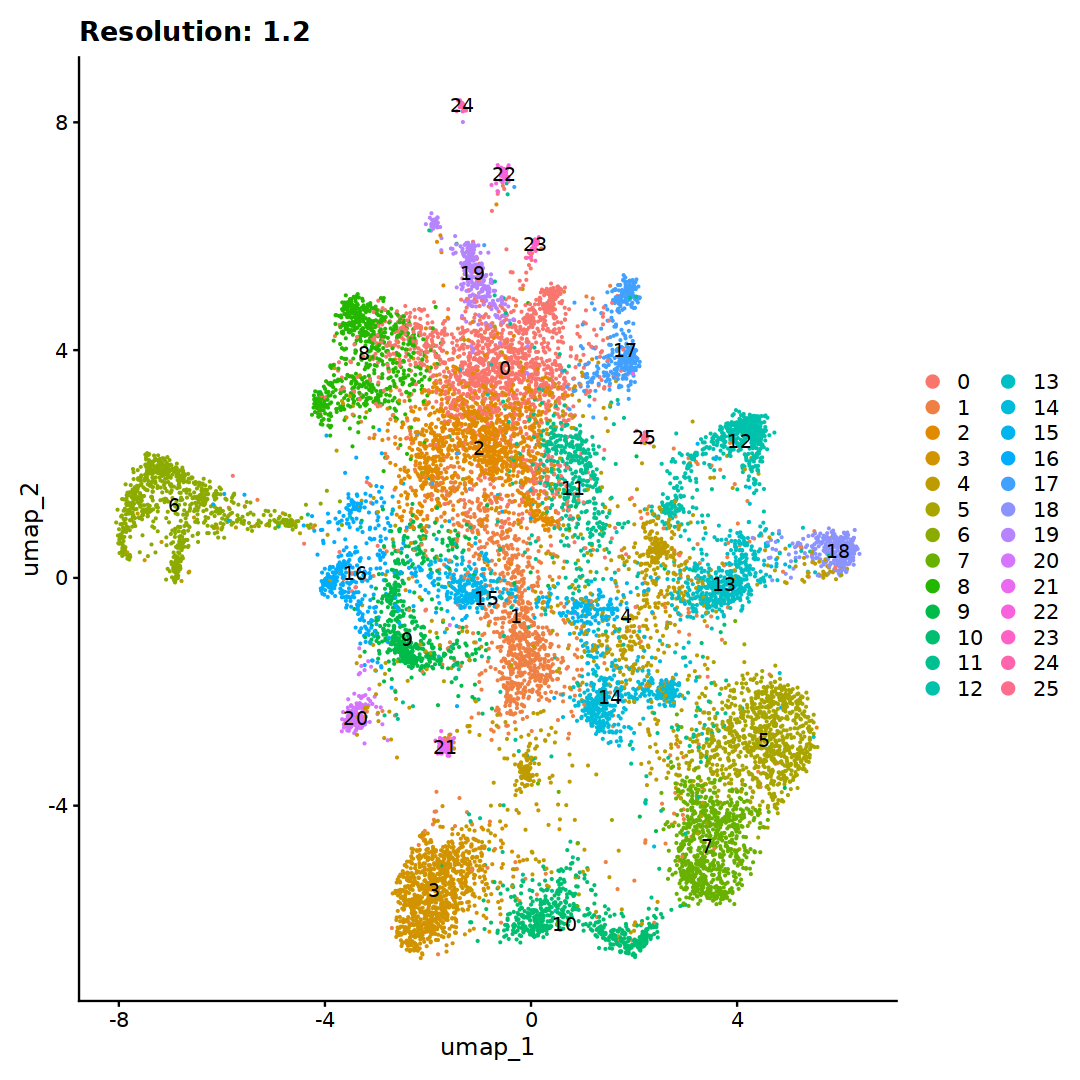

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 14339
Number of edges: 625549

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8101
Number of communities: 34
Elapsed time: 3 seconds


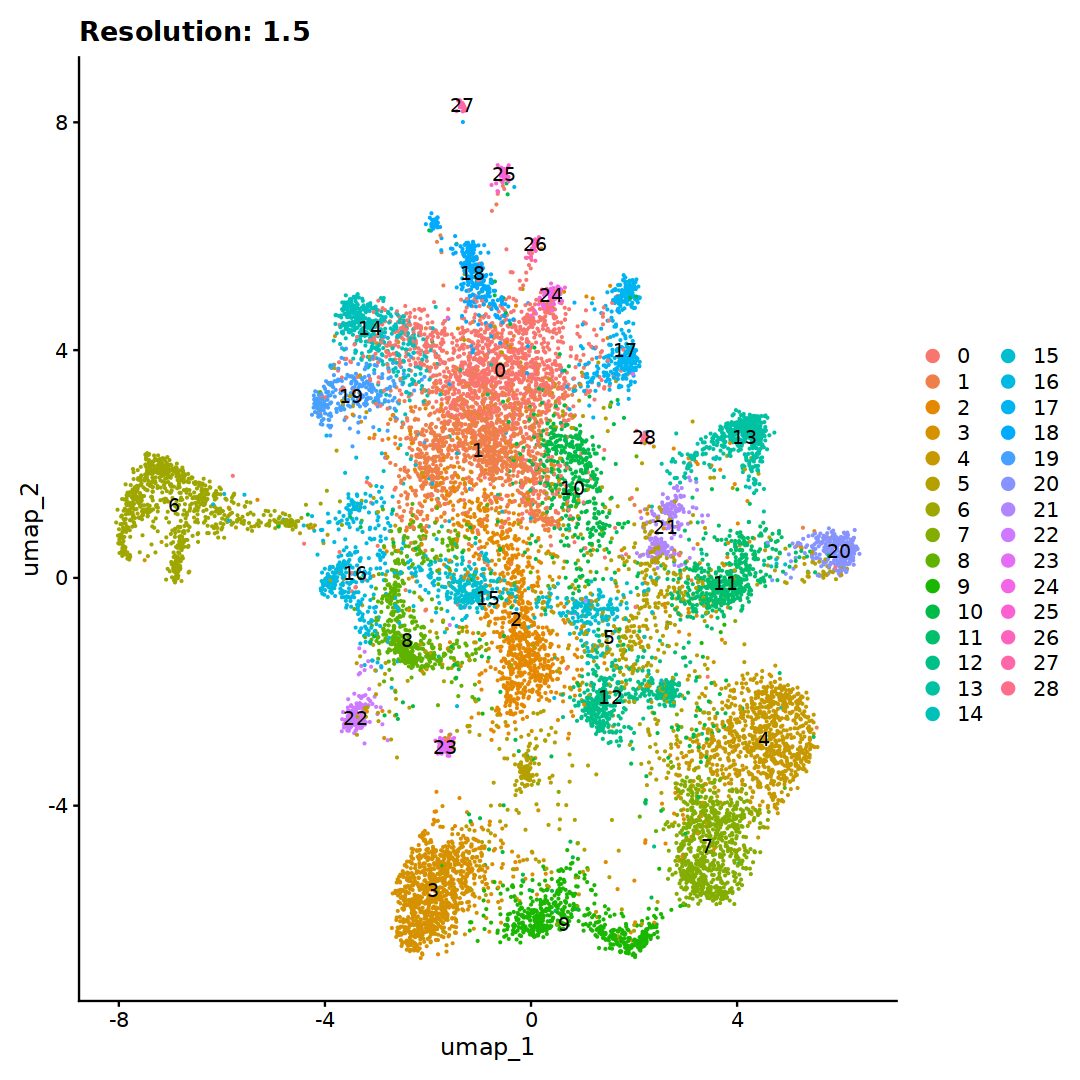

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 14339
Number of edges: 625549

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8009
Number of communities: 35
Elapsed time: 3 seconds


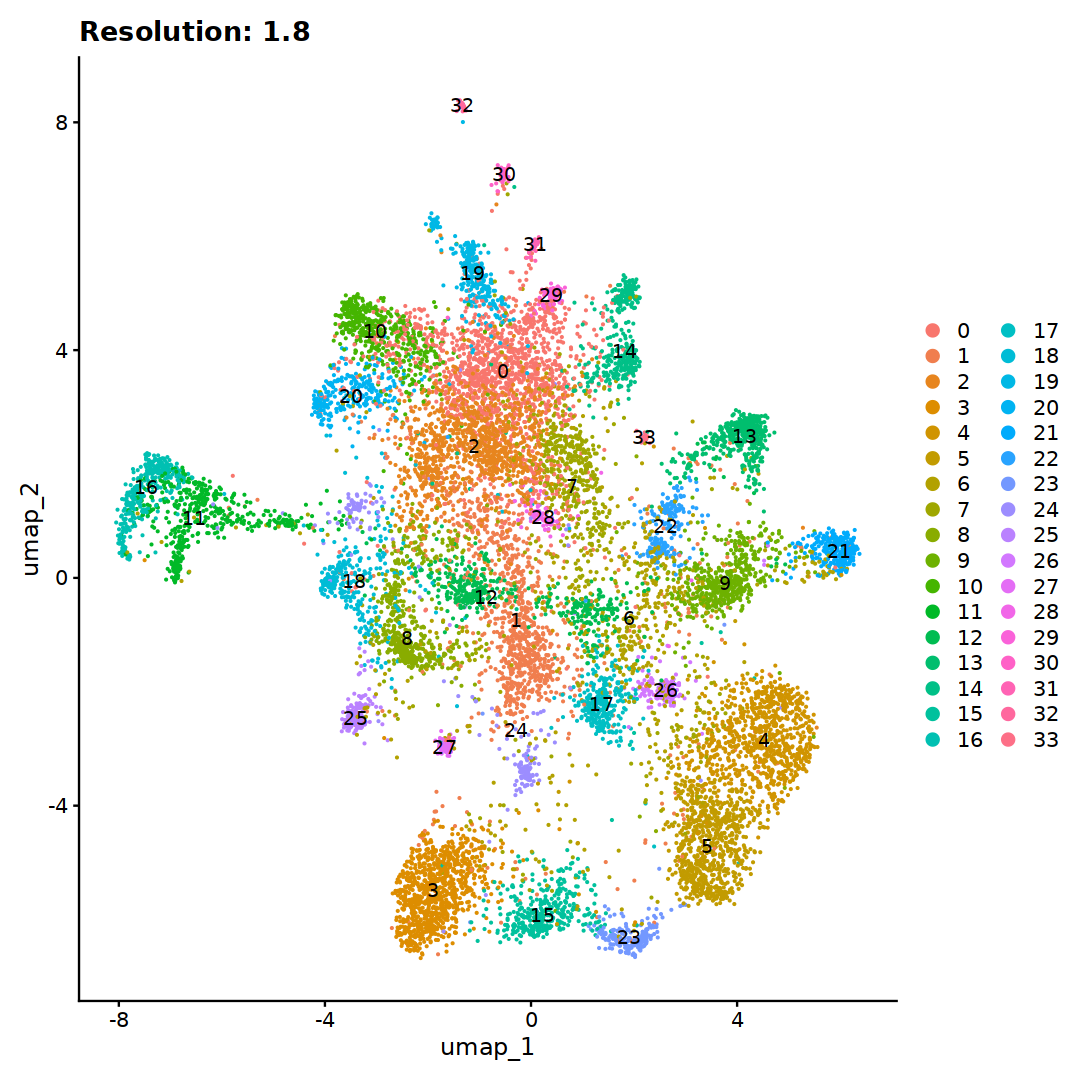

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 14339
Number of edges: 625549

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7790
Number of communities: 38
Elapsed time: 3 seconds


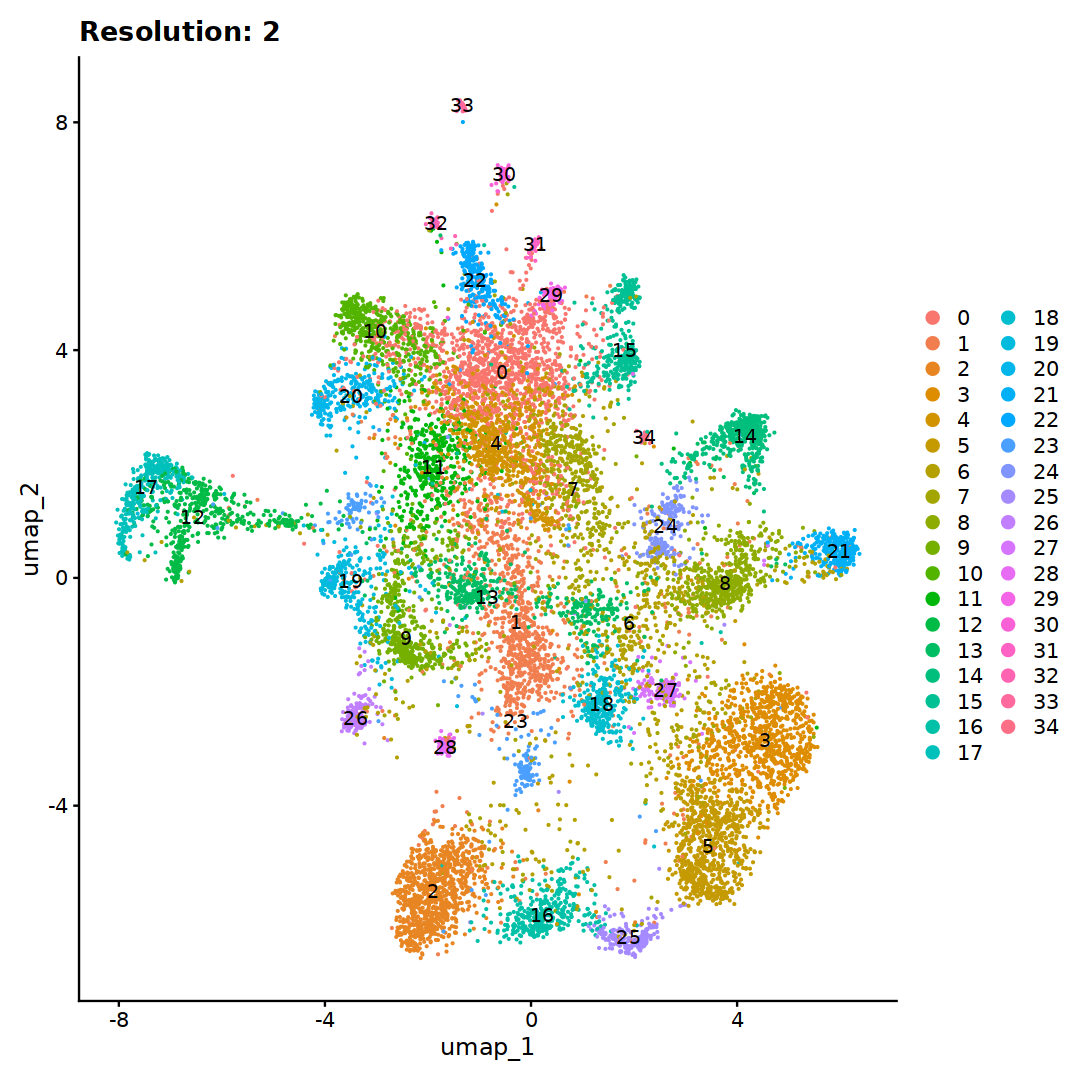

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 14339
Number of edges: 625549

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7597
Number of communities: 41
Elapsed time: 2 seconds


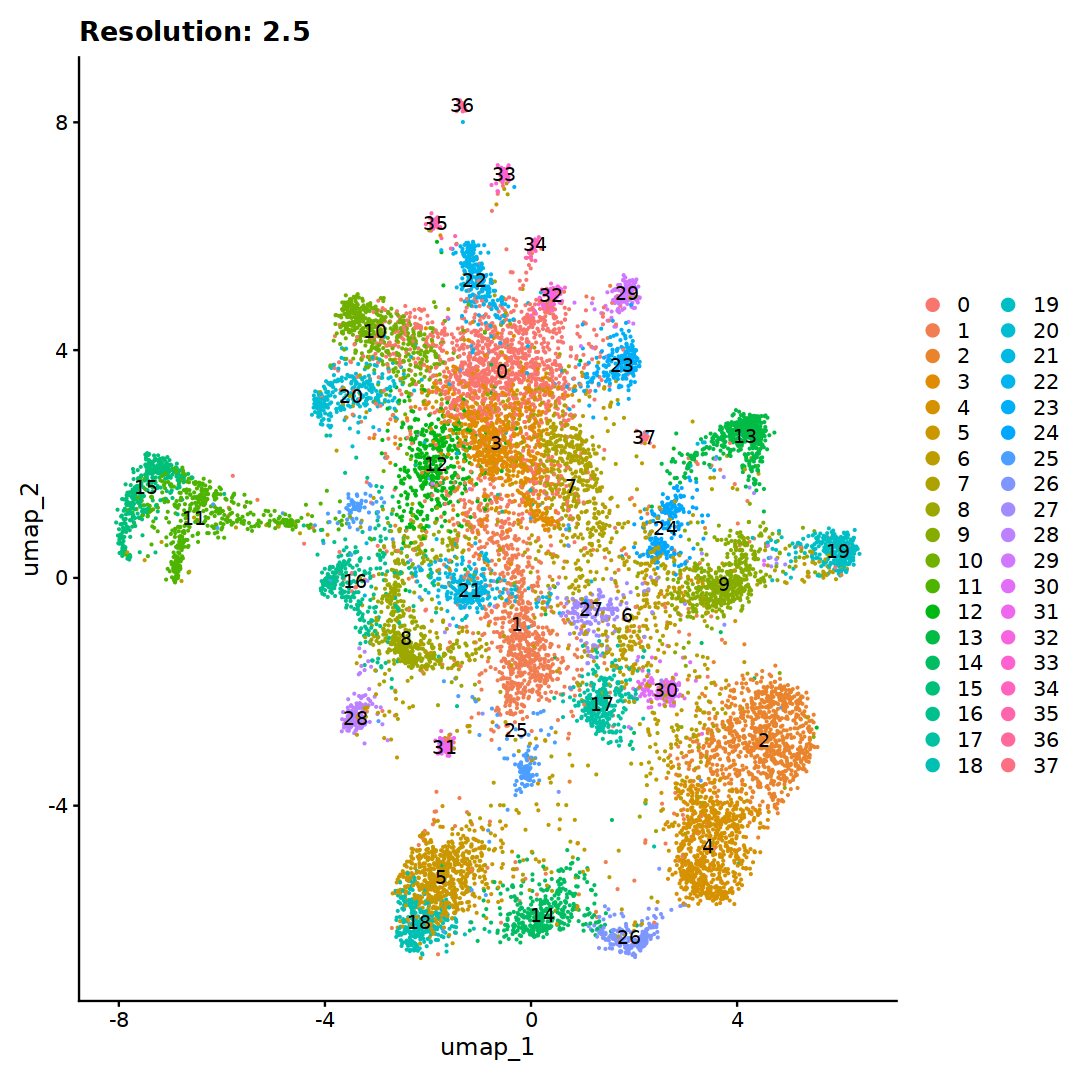

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 14339
Number of edges: 625549

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7418
Number of communities: 42
Elapsed time: 2 seconds


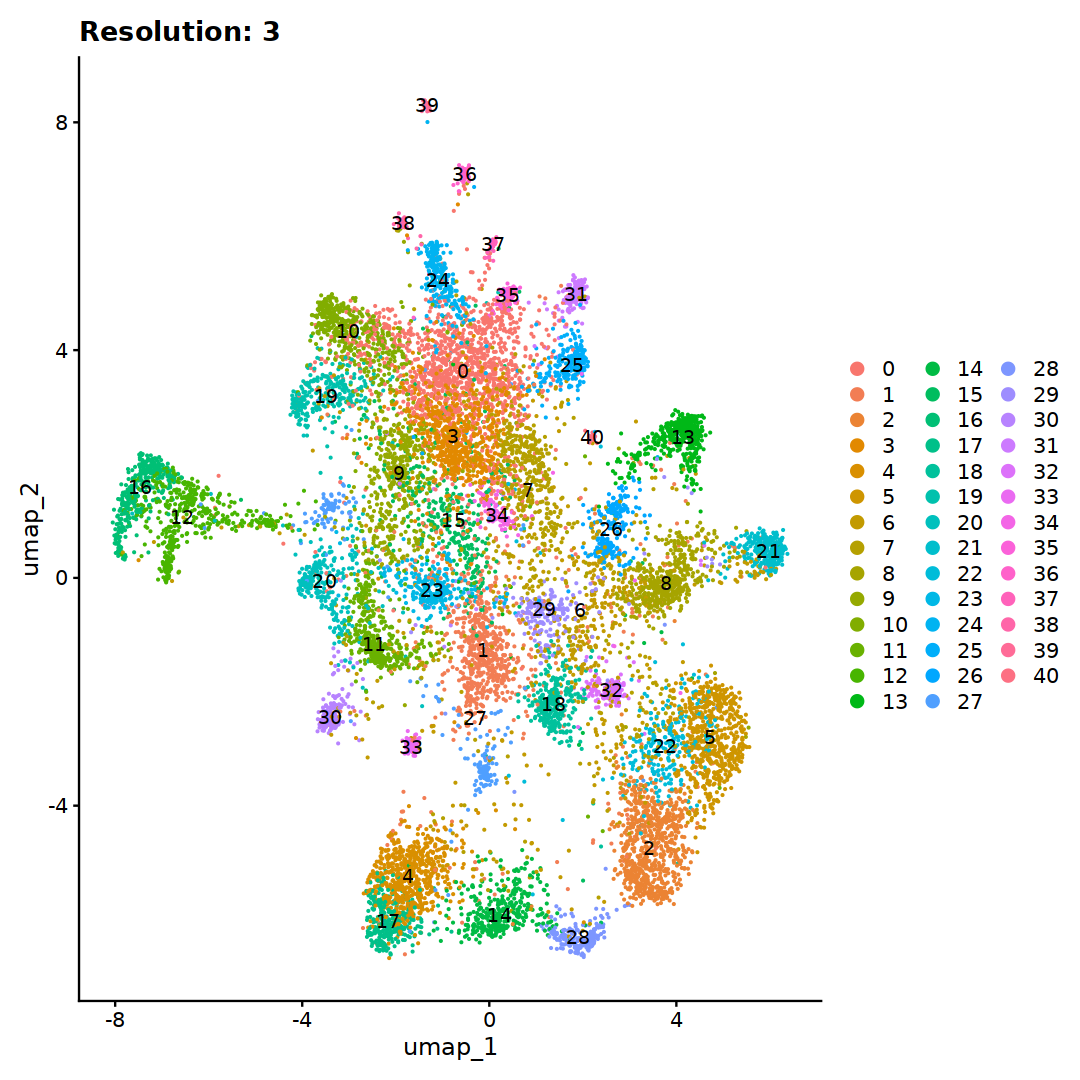

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 14339
Number of edges: 625549

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7244
Number of communities: 46
Elapsed time: 2 seconds


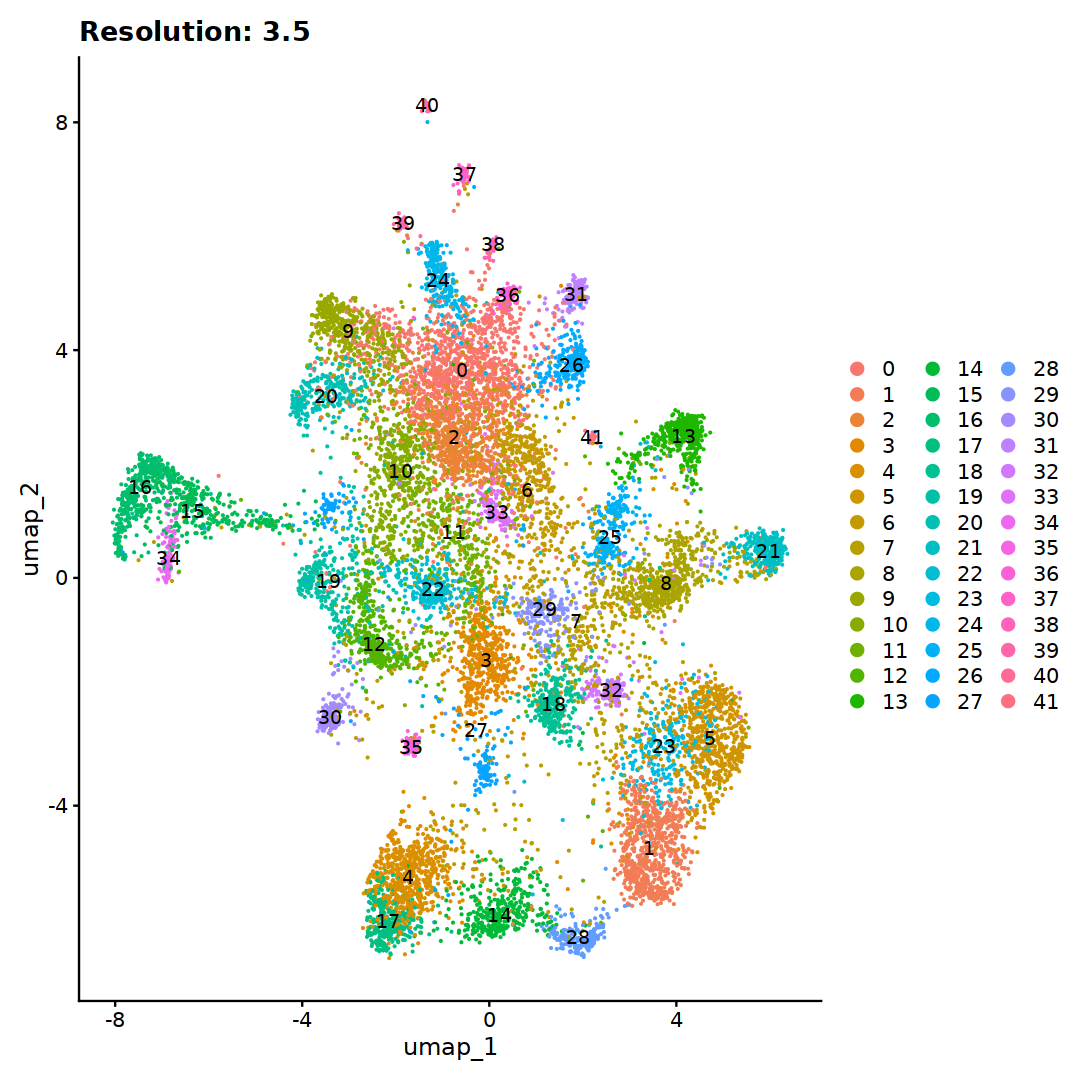

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 14339
Number of edges: 625549

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7088
Number of communities: 48
Elapsed time: 2 seconds


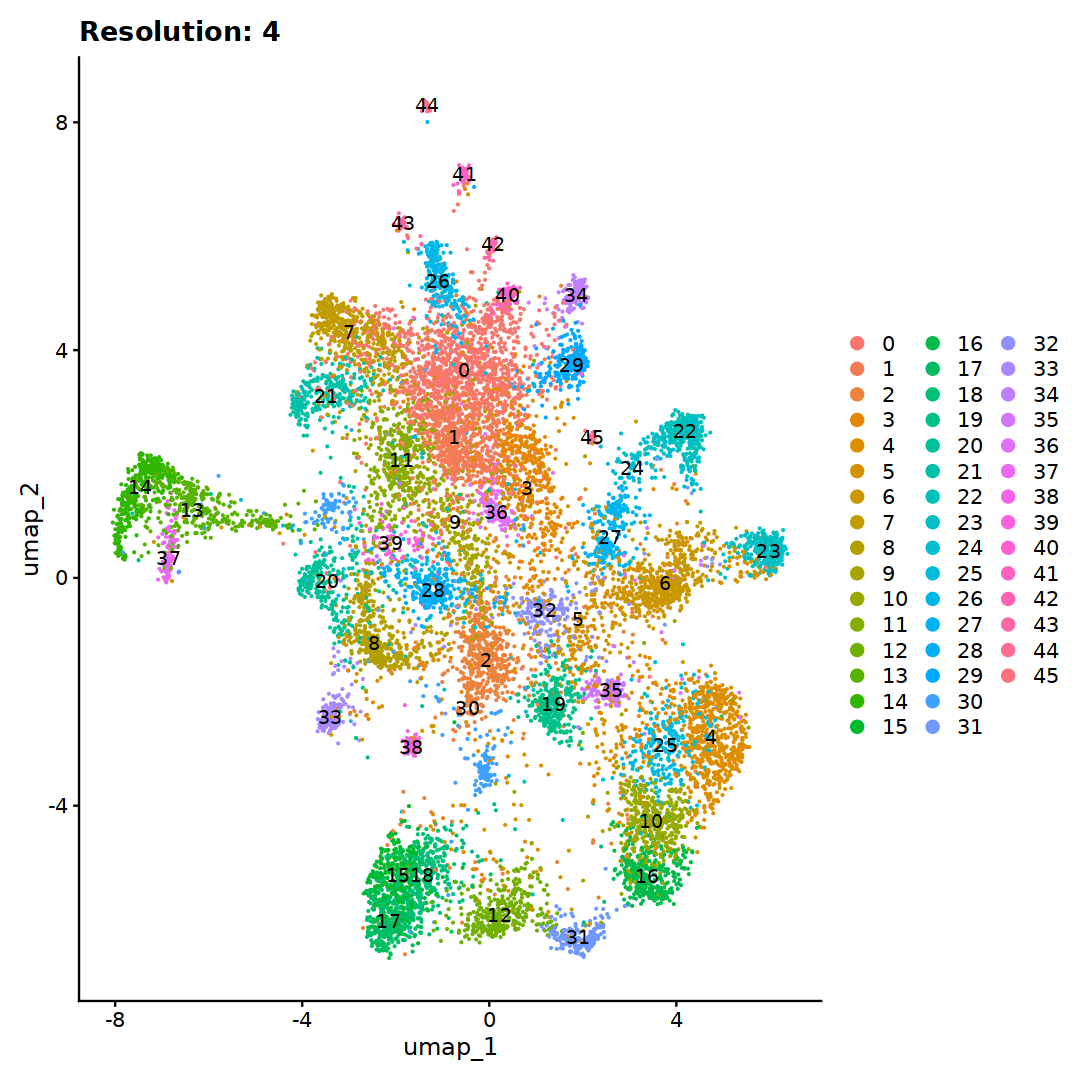

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 14339
Number of edges: 625549

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.6954
Number of communities: 52
Elapsed time: 2 seconds


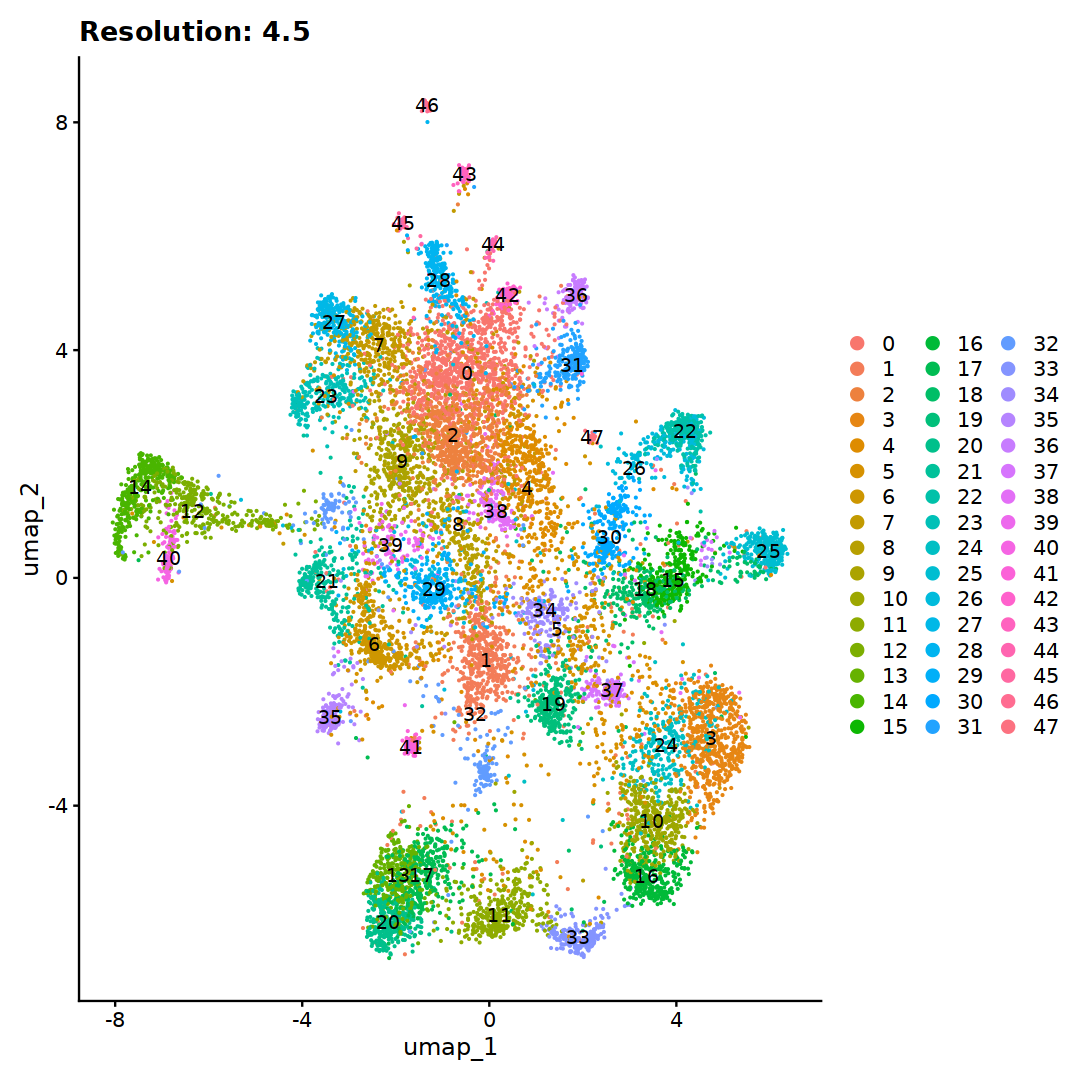

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 14339
Number of edges: 625549

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.6831
Number of communities: 54
Elapsed time: 3 seconds


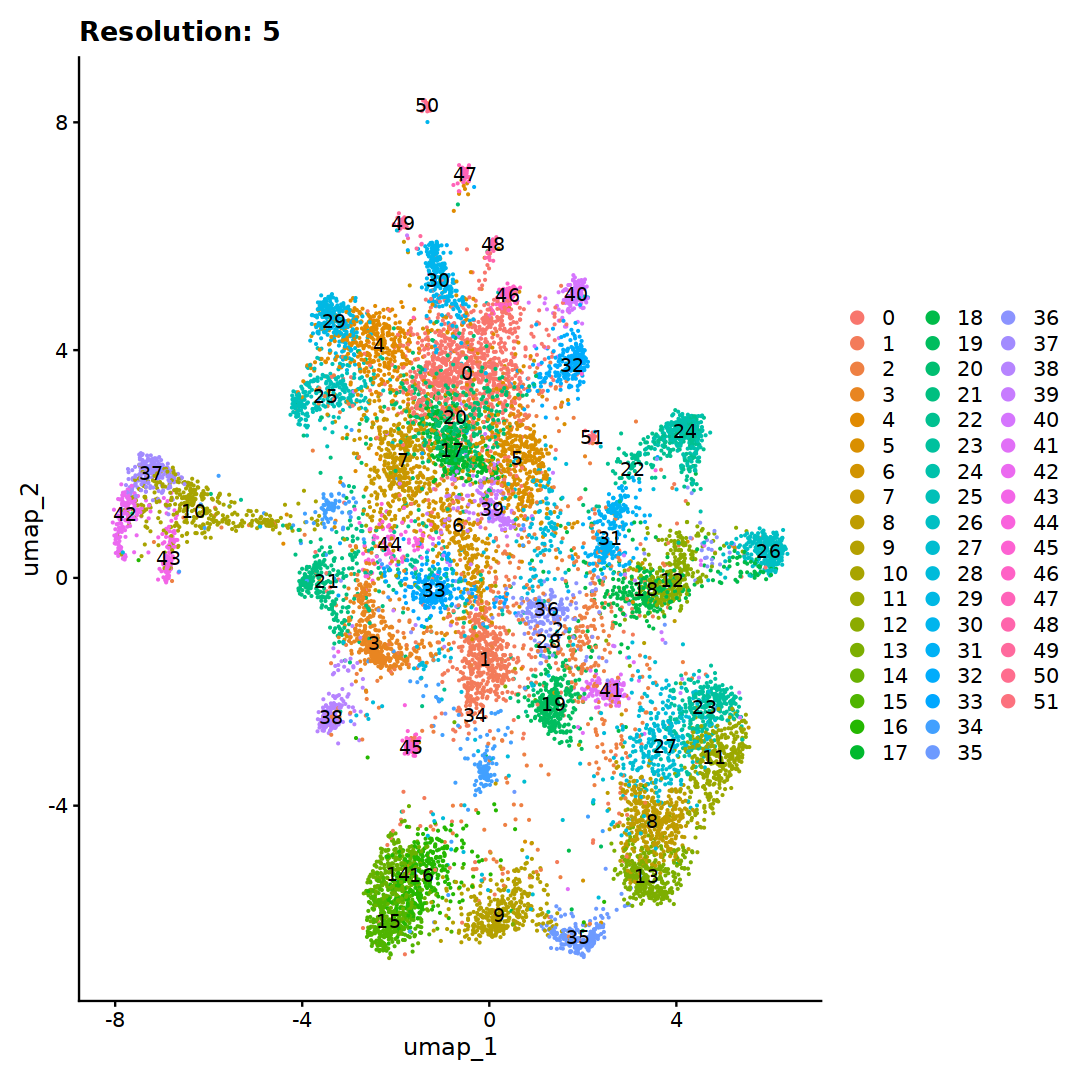

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 14339
Number of edges: 625549

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.6712
Number of communities: 55
Elapsed time: 3 seconds


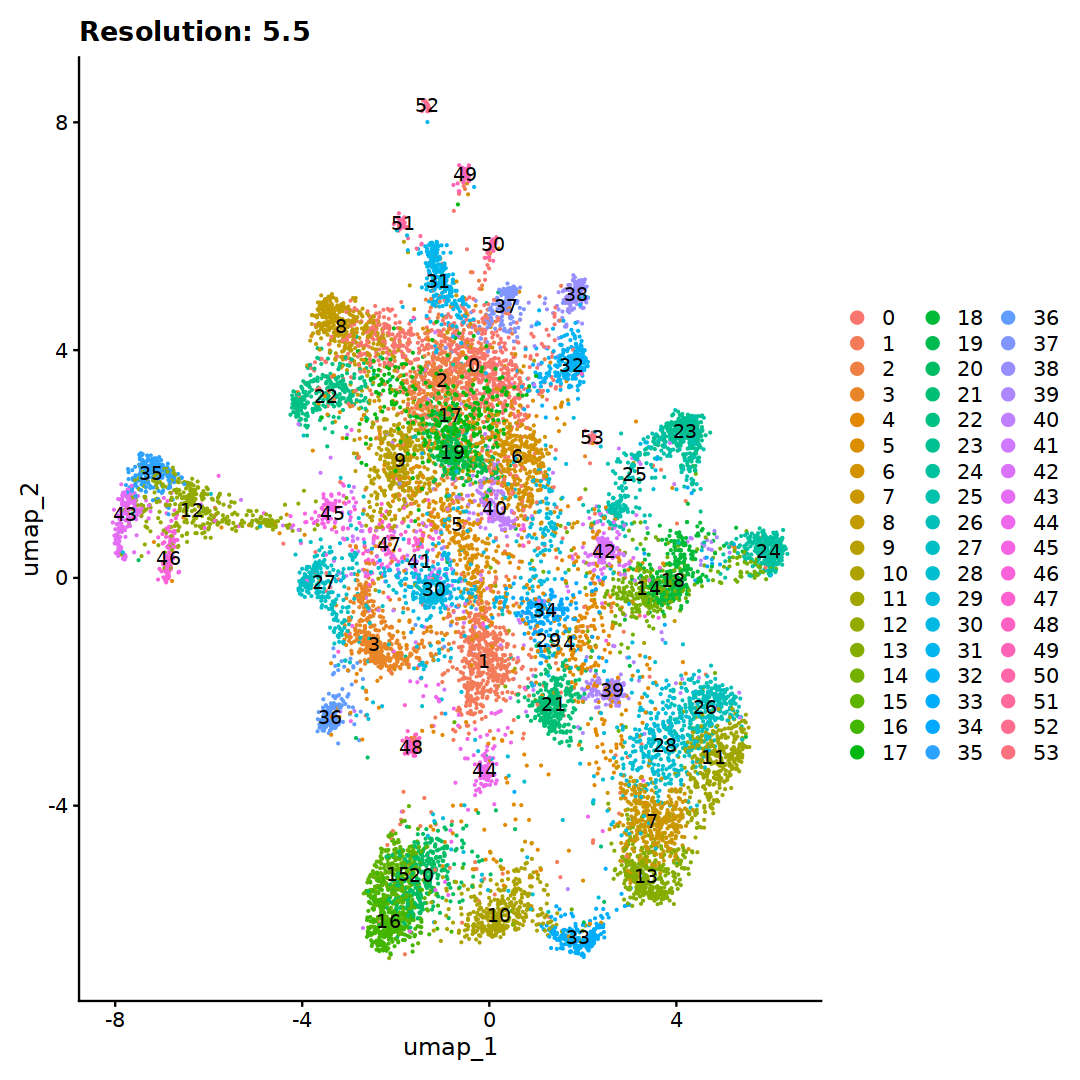

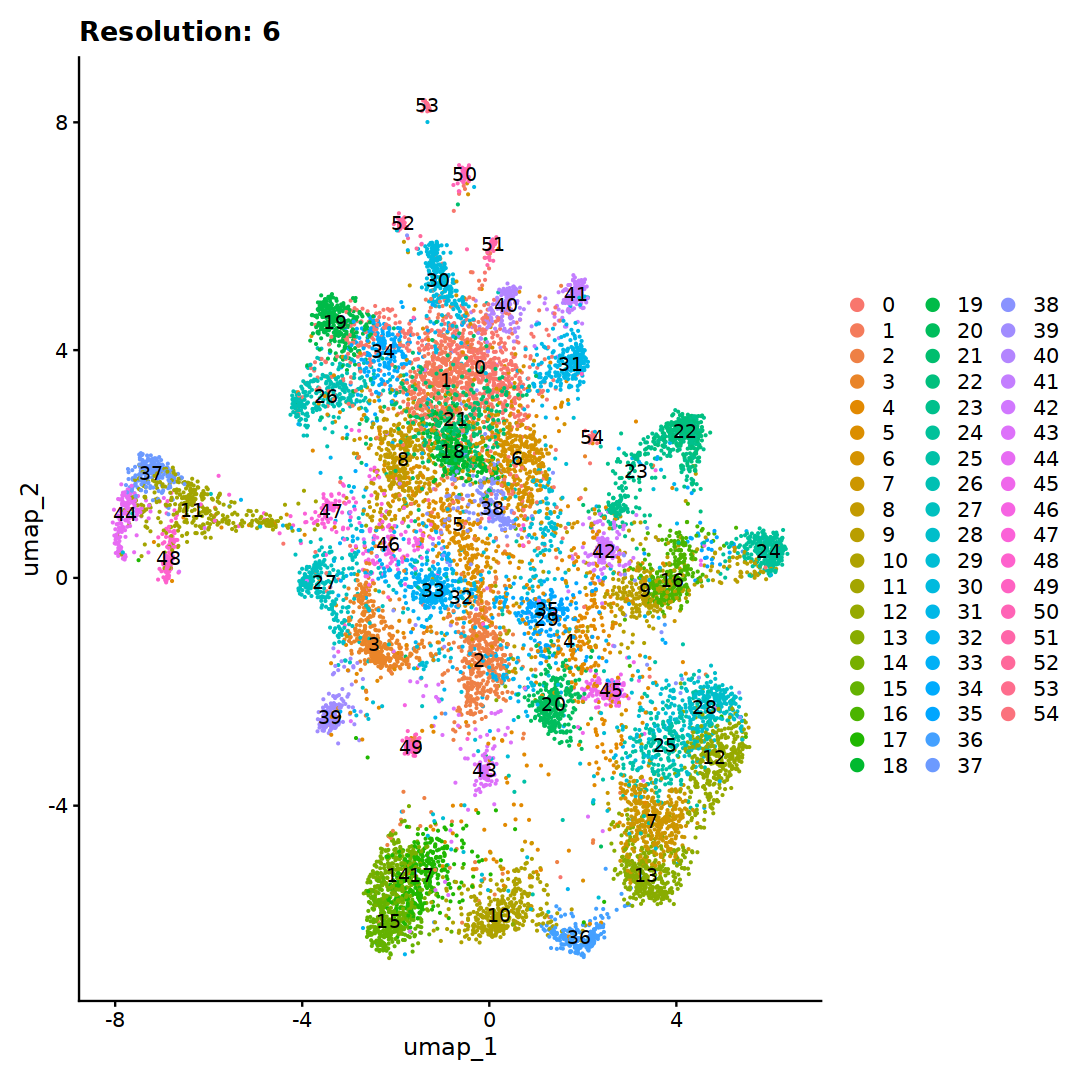

In [15]:
library(Seurat)
library(clustree)
library(dplyr)

# UMAP
TeO_Glu <- RunUMAP(TeO_Glu, dims = 1:40, verbose = TRUE)

cluster_results <- list()

# re-cluster
for (i in c(0.3,0.6,0.9,1,1.2,1.5, 1.8, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6)) {
  TeO_Glu <- FindClusters(TeO_Glu, resolution = i)
  
  res_col_name <- paste0("integrated_snn_res.", i)
  new_col_name <- paste0("Glu_", res_col_name)
  colnames(TeO_Glu@meta.data)[colnames(TeO_Glu@meta.data) == res_col_name] <- new_col_name
  
  cluster_results[[paste0("resolution_", i)]] <- TeO_Glu
  
  plot <- DimPlot(TeO_Glu, reduction = "umap", label = TRUE) + 
    labs(title = paste0("Resolution: ", i))
  print(plot)
}

In [ ]:
saveRDS(TeO_Glu, file = '/data/work/5month_TeO/10_budgerigar_brain_5months_TeO_Glu_unannotated.rds')